In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
defaulter_db = pd.read_csv('defaulter.csv')

In [3]:
defaulter_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
defaulter    11 non-null object
student      11 non-null object
balance      11 non-null float64
income       11 non-null float64
dtypes: float64(2), object(2)
memory usage: 432.0+ bytes


In [4]:
defaulter_db.describe()

,balance,income
count,11.000000,11.000000
mean,1048.456273,15982.946364
std,248.399967,2372.782997
min,673.812400,12106.140000
25%,875.019700,14261.430000
50%,1000.000000,16900.000000
75%,1255.065500,17678.870000
max,1486.998000,19282.440000


In [5]:
defaulter_db.head(10)

,defaulter,student,balance,income
0,No,Yes,817.1804,12106.14
1,Yes,Yes,1486.9980,17854.40
2,Yes,Yes,1102.4350,17391.78
3,Yes,Yes,1233.4460,12586.48
4,Yes,Yes,1276.6850,19282.44
5,Yes,Yes,1289.2460,13624.55
6,No,Yes,673.8124,17672.29
7,No,No,870.4124,17685.45
8,No,Yes,903.1768,15810.57
9,No,Yes,879.6270,14898.31


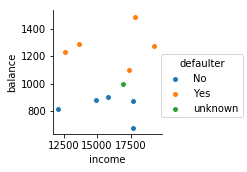

In [6]:
import seaborn as sns
sns.pairplot(defaulter_db,hue="defaulter",
             x_vars="income",y_vars="balance")

# Finding the distance between two points

In [7]:
x1 = defaulter_db.loc[0,['balance', 'income']]

In [8]:
x2 = defaulter_db.loc[1,['balance', 'income']]

In [9]:
# Euclidean distance
np.linalg.norm(x1-x2)

5787.1537602581275

# Normalizing the data

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

In [11]:
norm_value = scaler.fit_transform(defaulter_db[['balance', 'income']])

In [12]:
defaulter_db['norm_balance'] = norm_value[:,0]
defaulter_db['norm_income'] = norm_value[:,1]

In [13]:
defaulter_db

,defaulter,student,balance,income,norm_balance,norm_income
0,No,Yes,817.1804,12106.14,0.176304,0.000000
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587
6,No,Yes,673.8124,17672.29,0.000000,0.775630
7,No,No,870.4124,17685.45,0.241765,0.777463
8,No,Yes,903.1768,15810.57,0.282057,0.516203
9,No,Yes,879.6270,14898.31,0.253097,0.389082


In [14]:
scaler2 = StandardScaler().fit(defaulter_db[['balance', 'income']])

In [15]:
norm_value2 = scaler2.transform(defaulter_db[['balance', 'income']])

In [16]:
defaulter_db['norm_balance2'] = norm_value2[:,0]
defaulter_db['norm_income2'] = norm_value2[:,1]

In [17]:
defaulter_db

,defaulter,student,balance,income,norm_balance,norm_income,norm_balance2,norm_income2
0,No,Yes,817.1804,12106.14,0.176304,0.000000,-0.976506,-1.713612
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,1.851636,0.827213
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.227912,0.622727
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.781074,-1.501294
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.963641,1.458430
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,1.016676,-1.042450
6,No,Yes,673.8124,17672.29,0.000000,0.775630,-1.581843,0.746717
7,No,No,870.4124,17685.45,0.241765,0.777463,-0.751747,0.752534
8,No,Yes,903.1768,15810.57,0.282057,0.516203,-0.613407,-0.076193
9,No,Yes,879.6270,14898.31,0.253097,0.389082,-0.712841,-0.479427


In [18]:
x1 = defaulter_db.loc[0,['norm_balance', 'norm_income']]

In [19]:
x2 = defaulter_db.loc[1,['norm_balance', 'norm_income']]

In [20]:
np.linalg.norm(x1-x2)

1.1489497815843785

In [21]:
x1 = defaulter_db.loc[0,['norm_balance2', 'norm_income2']]

In [22]:
x2 = defaulter_db.loc[1,['norm_balance2', 'norm_income2']]

In [23]:
np.linalg.norm(x1-x2)

3.8018658066128808

# Predicting based on kNN

In [24]:
x11 = defaulter_db.loc[10,['norm_balance', 'norm_income']]

In [25]:
x11

norm_balance    0.401123
norm_income     0.668013
Name: 10, dtype: object

In [26]:
dist_to_x11 = lambda x: np.linalg.norm(x-x11)

In [28]:
defaulter_db["dist_toX11"] = defaulter_db[["norm_balance",
                                               "norm_income"]].apply(dist_to_x11,axis=1)

In [29]:
defaulter_db

,defaulter,student,balance,income,norm_balance,norm_income,norm_balance2,norm_income2,dist_toX11
0,No,Yes,817.1804,12106.14,0.176304,0.000000,-0.976506,-1.713612,0.704830
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,1.851636,0.827213,0.613466
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.227912,0.622727,0.143401
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.781074,-1.501294,0.666114
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.963641,1.458430,0.475378
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,1.016676,-1.042450,0.578657
6,No,Yes,673.8124,17672.29,0.000000,0.775630,-1.581843,0.746717,0.415309
7,No,No,870.4124,17685.45,0.241765,0.777463,-0.751747,0.752534,0.193325
8,No,Yes,903.1768,15810.57,0.282057,0.516203,-0.613407,-0.076193,0.192932
9,No,Yes,879.6270,14898.31,0.253097,0.389082,-0.712841,-0.479427,0.315775


In [30]:
# Feature variables
X = defaulter_db[['norm_balance', 'norm_income']]

In [31]:
# Target variables
y = defaulter_db['defaulter']

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=100)

# Model

In [109]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6, metric='euclidean')

In [110]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [111]:
# Accuracy
model.score(X_train, y_train)

0.7142857142857143

In [112]:
# Test accuracy
model.score(X_test, y_test)

0.75

# Tunning the hyperparameter k/n_neighnors

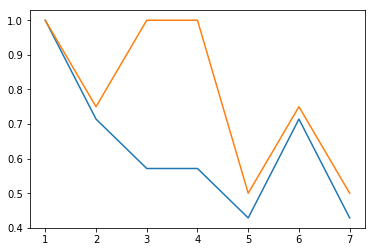

In [115]:
train_accuracies = []
test_accuracies = []
# building KNN model for values of k from 1 to 7
k_vals = [i for i in range(1, 8)]

for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(X_train, y_train)
    train_accuracy_k = model.score(X_train, y_train)
    test_accuracy_k = model.score(X_test, y_test)
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)
    
plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)